# 5~10 MA baseline

In [6]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [7]:
data_test = pd.read_csv('../models-v2-lle/testset_w_lle.csv')
data_test.head()

,attendance,is_federal_holiday,venue,on_grass,temperature,wind_speed,team1_name,team1_pre_win,team1_pre_loss,team1_pre_win_pct,...,start_hour,start_hour_label_afternoon,start_hour_label_evening,start_hour_label_night,start_hour_label_noon,game_page_url,start_time,previous_5_to_10MA,lle1,lle2
0,35112,0,Wrigley Field,1,-2.786672,1.292848,MIL,-1.62645,-1.654514,0.0,...,13,0,0,0,1,https://www.baseball-reference.com/boxes/CHN/C...,2022-04-07 13:20:00,38208.209877,0.009912,-0.006604
1,28459,0,Kauffman Stadium,1,-2.503546,1.688830,CLE,-1.62645,-1.654514,0.0,...,15,1,0,0,0,https://www.baseball-reference.com/boxes/KCA/K...,2022-04-07 15:10:00,18495.737500,0.007218,0.002121
2,46256,0,Busch Stadium III,1,-2.220421,2.480794,PIT,-1.62645,-1.654514,0.0,...,15,1,0,0,0,https://www.baseball-reference.com/boxes/SLN/S...,2022-04-07 15:15:00,42967.814815,0.007821,0.004266
3,44723,0,Angel Stadium of Anaheim,1,1.837706,-0.291081,HOU,-1.62645,-1.654514,0.0,...,18,0,1,0,0,https://www.baseball-reference.com/boxes/ANA/A...,2022-04-07 18:38:00,37321.135802,0.008651,-0.001540
4,35508,0,Chase Field,0,1.837706,-0.291081,SDP,-1.62645,-1.654514,0.0,...,18,0,1,0,0,https://www.baseball-reference.com/boxes/ARI/A...,2022-04-07 18:40:00,26364.320988,0.008440,-0.000359


In [8]:
y_test = data_test['attendance'].to_numpy()
y_pred = data_test['previous_5_to_10MA'].to_numpy()

In [9]:
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test MAPE:", mean_absolute_percentage_error(y_test, y_pred))

Test MSE: 72263690.8802977
Test RMSE: 8500.805307751596
Test MAE: 6766.844407456573
Test MAPE: 0.34921441042822426


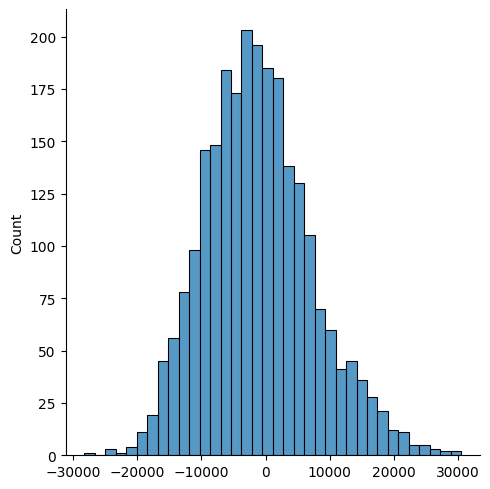

In [10]:
import seaborn as sns
sns.displot(y_test - y_pred)

Text(0, 0.5, 'Predicted Audience')

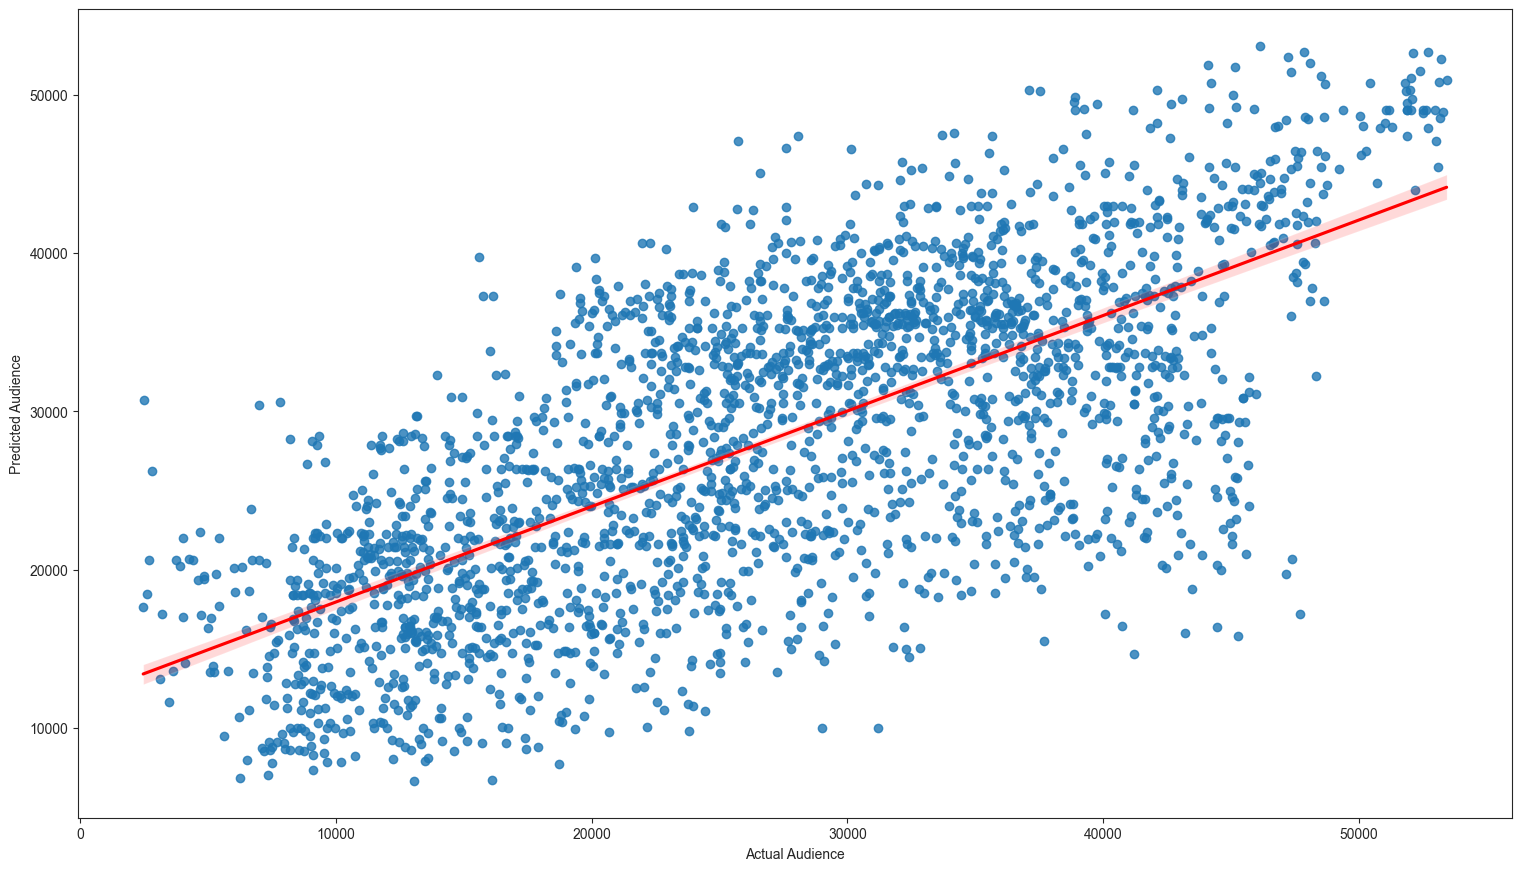

In [11]:
from matplotlib import pyplot as plt
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.regplot(x=y_test, y=y_pred, ax=ax, line_kws={"color": "red"})
plt.xlabel("Actual Audience")
plt.ylabel("Predicted Audience")